In [56]:
import pandas as pd


plots = []

df = pd.read_csv('Random_Tests/Final_Features_30_Features.csv')

df.head()


,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts,FTR
0,0,-2.243556,-2.302919,False,False,True,False,False,False,True,...,True,False,False,False,True,False,0.013859,-0.020465,0.0,H
1,1,-2.243556,-2.302919,False,False,True,False,False,False,True,...,True,False,False,False,True,False,0.013859,-0.020465,0.0,H
2,2,-2.243556,-2.302919,False,False,True,False,False,False,True,...,True,False,False,False,True,False,0.013859,-0.020465,0.0,NH
3,3,-2.243556,-2.302919,False,False,True,False,False,False,True,...,True,False,False,False,True,False,0.013859,-0.020465,0.0,NH
4,4,-2.243556,-2.302919,False,False,True,False,False,False,True,...,True,False,False,False,True,False,0.013859,-0.020465,0.0,H


In [57]:
from src.utils.eda_functions.visualization_methods import *

In [52]:
import os

# os.chdir("astro_airflow_mlflow")

In [58]:
%pwd


'/media/toni-birat/New Volume/English_Premier_League_Complete_Project/astro_airflow_mlflow'

In [60]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def get_scatter_matrix(df):
  """
  Generate a scatter matrix for the given dataset.
  Shows relationships between all key numerical features simultaneously.
  Essential for identifying patterns, correlations, and potential multicollinearity.
  
  Parameters:
  df (pd.DataFrame): The dataset containing the columns to visualize.
  
  Returns:
  numpy.ndarray: Array of axes objects from the scatter matrix plot.
  """
  # Create and return the scatter matrix plot so that we can append it to the list of plots
  return scatter_matrix(df[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

def get_correlation_matrix(df):
  """
  Generate a correlation matrix for the given dataset.
  Critical for understanding feature relationships and avoiding multicollinearity in models.
  Helps identify which features provide unique information vs redundant signals.
  
  Parameters:
  df (pd.DataFrame): The dataset containing the columns to visualize.
  
  Returns:
  pandas.io.formats.style.Styler: Styled correlation matrix for display.
  """
  # Create and return the correlation matrix plot so that we can append it to the list of plots
  return df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

def get_team_points_comparison(df):
  """
  Generate a scatter plot comparing home and away team points.
  Shows competitive balance and helps identify mismatched games.
  Points above the diagonal line indicate home team advantage in league standing.
  
  Parameters:
  df (pd.DataFrame): The dataset containing HTP and ATP columns.
  
  Returns:
  matplotlib.figure.Figure: The points comparison plot.
  """
  fig, ax = plt.subplots(figsize=(10, 8))
  scatter = ax.scatter(df['HTP'], df['ATP'], alpha=0.6, c='blue', s=50)
  ax.plot([0, max(df['HTP'].max(), df['ATP'].max())], 
    [0, max(df['HTP'].max(), df['ATP'].max())], 
    'r--', alpha=0.8, label='Equal Points Line')
  ax.set_xlabel('Home Team Points (HTP)')
  ax.set_ylabel('Away Team Points (ATP)')
  ax.set_title('Home vs Away Team Points Comparison')
  ax.legend()
  ax.grid(True, alpha=0.3)
  
  # Add text annotation for interpretation
  ax.text(0.02, 0.98, 'Points above red line:\nHome team has better season record', 
      transform=ax.transAxes, verticalalignment='top', fontsize=10, 
      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

  fig.savefig('team_points_comparison.png', dpi=300)

  return fig

def get_goal_difference_distribution(df):
  """
  Generate histograms showing goal difference distributions for home and away teams.
  Essential for understanding team quality distribution and identifying outliers.
  Helps assess whether the dataset has balanced representation of team strengths.
  
  Parameters:
  df (pd.DataFrame): The dataset containing HTGD and ATGD columns.
  
  Returns:
  matplotlib.figure.Figure: The goal difference distribution plot.
  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  
  # Home team goal difference
  ax1.hist(df['HTGD'], bins=30, alpha=0.7, color='green', edgecolor='black')
  ax1.set_xlabel('Home Team Goal Difference (HTGD)')
  ax1.set_ylabel('Frequency')
  ax1.set_title('Distribution of Home Team Goal Difference')
  ax1.grid(True, alpha=0.3)
  ax1.axvline(df['HTGD'].mean(), color='red', linestyle='--', 
        label=f'Mean: {df["HTGD"].mean():.2f}')
  ax1.legend()
  
  # Away team goal difference
  ax2.hist(df['ATGD'], bins=30, alpha=0.7, color='red', edgecolor='black')
  ax2.set_xlabel('Away Team Goal Difference (ATGD)')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Distribution of Away Team Goal Difference')
  ax2.grid(True, alpha=0.3)
  ax2.axvline(df['ATGD'].mean(), color='blue', linestyle='--', 
        label=f'Mean: {df["ATGD"].mean():.2f}')
  ax2.legend()
  
  plt.tight_layout()
  return fig

def get_form_points_analysis(df):
  """
  Generate a visualization showing the relationship between form points difference and goal differences.
  Critical for validating that recent form correlates with underlying team quality.
  Helps identify if momentum (form) aligns with actual performance metrics (goals).
  
  Parameters:
  df (pd.DataFrame): The dataset containing DiffFormPts, HTGD, and ATGD columns.
  
  Returns:
  matplotlib.figure.Figure: The form points analysis plot.
  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  
  # Form points vs Home goal difference
  ax1.scatter(df['DiffFormPts'], df['HTGD'], alpha=0.6, color='blue', s=30)
  ax1.set_xlabel('Form Points Difference (DiffFormPts)')
  ax1.set_ylabel('Home Team Goal Difference (HTGD)')
  ax1.set_title('Form Points Difference vs Home Team Goal Difference')
  ax1.grid(True, alpha=0.3)
  
  # Add trend line
  z = np.polyfit(df['DiffFormPts'], df['HTGD'], 1)
  p = np.poly1d(z)
  ax1.plot(df['DiffFormPts'], p(df['DiffFormPts']), "r--", alpha=0.8)
  
  # Form points vs Away goal difference
  ax2.scatter(df['DiffFormPts'], df['ATGD'], alpha=0.6, color='red', s=30)
  ax2.set_xlabel('Form Points Difference (DiffFormPts)')
  ax2.set_ylabel('Away Team Goal Difference (ATGD)')
  ax2.set_title('Form Points Difference vs Away Team Goal Difference')
  ax2.grid(True, alpha=0.3)
  
  # Add trend line
  z2 = np.polyfit(df['DiffFormPts'], df['ATGD'], 1)
  p2 = np.poly1d(z2)
  ax2.plot(df['DiffFormPts'], p2(df['DiffFormPts']), "r--", alpha=0.8)
  
  plt.tight_layout()
  return fig

def get_recent_form_heatmap(df):
  """
  Generate a heatmap showing the distribution of recent form results.
  Essential for understanding the balance of recent form outcomes in the dataset.
  Helps identify if there's bias towards certain results (e.g., too many wins/losses).
  
  Parameters:
  df (pd.DataFrame): The dataset containing form indicator columns.
  
  Returns:
  matplotlib.figure.Figure: The recent form heatmap.
  """
  # Select form columns
  form_cols = ['HM1_W', 'HM1_D', 'HM1_L', 'HM1_M', 'AM1_W', 'AM1_D', 'AM1_L', 'AM1_M']
  form_data = df[form_cols].sum().values.reshape(2, 4)
  
  fig, ax = plt.subplots(figsize=(10, 6))
  
  # Create labels
  team_labels = ['Home Team', 'Away Team']
  result_labels = ['Win', 'Draw', 'Loss', 'Missing']
  
  # Create heatmap
  im = ax.imshow(form_data, cmap='YlOrRd', aspect='auto')
  
  # Set ticks and labels
  ax.set_xticks(np.arange(len(result_labels)))
  ax.set_yticks(np.arange(len(team_labels)))
  ax.set_xticklabels(result_labels)
  ax.set_yticklabels(team_labels)
  
  # Add text annotations
  for i in range(len(team_labels)):
    for j in range(len(result_labels)):
      text = ax.text(j, i, str(int(form_data[i, j])), ha="center", va="center", 
              color="black", fontweight='bold')
  
  ax.set_title('Distribution of Most Recent Match Results (Last Match)')
  plt.colorbar(im, ax=ax)
  return fig

def get_feature_correlation_heatmap(df):
  """
  Generate a detailed correlation heatmap for key features.
  Critical for feature selection and understanding multicollinearity.
  Helps identify which features can be combined or removed to improve model performance.
  
  Parameters:
  df (pd.DataFrame): The dataset containing all features.
  
  Returns:
  matplotlib.figure.Figure: The feature correlation heatmap.
  """
  # Select key features for correlation analysis
  key_features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts', 
           'HM1_W', 'HM1_L', 'AM1_W', 'AM1_L']
  
  # Calculate correlation matrix
  corr_matrix = df[key_features].corr()
  
  fig, ax = plt.subplots(figsize=(12, 10))
  
  # Create heatmap
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
        square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=ax)
  
  ax.set_title('Correlation Matrix of Key Features')
  plt.tight_layout()
  return fig

def get_target_distribution_fixed(df):
  """
  Visualize the distribution of match outcomes (FTR - Full Time Result).
  Essential for understanding class balance in the target variable.
  Critical for choosing appropriate model evaluation metrics and sampling strategies.
  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  
  # Count plot
  outcome_counts = df['FTR'].value_counts()
  unique_outcomes = outcome_counts.index.tolist()
  
  # Use different colors based on number of categories
  if len(unique_outcomes) == 2:
    colors = ['green', 'red']
    labels = ['Home Win', 'Not Home Win']
  elif len(unique_outcomes) == 3:
    colors = ['green', 'gray', 'red']
    labels = ['Home Win', 'Draw', 'Away Win']
  else:
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_outcomes)))
    labels = [f'Outcome {outcome}' for outcome in unique_outcomes]
  
  ax1.bar(range(len(outcome_counts)), outcome_counts.values, color=colors[:len(outcome_counts)], alpha=0.7)
  ax1.set_xlabel('Match Outcome')
  ax1.set_ylabel('Frequency')
  ax1.set_title('Distribution of Match Outcomes')
  ax1.set_xticks(range(len(outcome_counts)))
  ax1.set_xticklabels(labels[:len(outcome_counts)])
  
  # Add percentage labels
  total = len(df)
  for i, count in enumerate(outcome_counts.values):
    percentage = (count/total) * 100
    ax1.text(i, count + 50, f'{percentage:.1f}%', ha='center', fontweight='bold')
  
  # Pie chart with correct labels
  ax2.pie(outcome_counts.values, labels=labels[:len(outcome_counts)], 
      colors=colors[:len(outcome_counts)], autopct='%1.1f%%', startangle=90)
  ax2.set_title('Match Outcome Proportions')
  
  plt.tight_layout()
  return fig

def get_feature_importance_boxplots(df):
  """
  Create box plots showing feature distributions for each match outcome.
  Essential for understanding which features best discriminate between outcomes.
  Helps identify the most predictive features for model building.
  
  Parameters:
  df (pd.DataFrame): The dataset containing features and outcomes.
  
  Returns:
  matplotlib.figure.Figure: The feature importance boxplots.
  """
  fig, axes = plt.subplots(2, 3, figsize=(18, 12))
  axes = axes.ravel()
  
  key_features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts']
  feature_names = ['Home Team Points', 'Away Team Points', 'Home Goal Diff', 
          'Away Goal Diff', 'Form Points Diff']
  
  for i, (feature, name) in enumerate(zip(key_features, feature_names)):
    df.boxplot(column=feature, by='FTR', ax=axes[i])
    axes[i].set_title(f'{name} by Match Outcome')
    axes[i].set_xlabel('Match Outcome')
    axes[i].set_ylabel(name)
    axes[i].grid(True, alpha=0.3)
  
  # Add combined feature analysis
  df['strength_advantage'] = (df['HTP'] + df['HTGD']) - (df['ATP'] + df['ATGD'])
  df.boxplot(column='strength_advantage', by='FTR', ax=axes[5])
  axes[5].set_title('Overall Strength Advantage by Match Outcome')
  axes[5].set_xlabel('Match Outcome')
  axes[5].set_ylabel('Strength Advantage')
  axes[5].grid(True, alpha=0.3)
  
  plt.suptitle('Feature Distributions by Match Outcome', fontsize=16)
  plt.tight_layout()
  return fig

def get_temporal_trends(df):
  """
  Analyze trends in team performance and match outcomes over time.
  Important for detecting seasonal patterns and data quality issues.
  Helps understand if there are time-based biases in the dataset.
  
  Parameters:
  df (pd.DataFrame): The dataset with index representing chronological order.
  
  Returns:
  matplotlib.figure.Figure: The temporal trends plot.
  """
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
  
  # Create time bins based on index (assuming chronological order)
  df['time_bin'] = pd.cut(df.index, bins=20)
  
  # 1. Average team points over time
  avg_points_time = df.groupby('time_bin')[['HTP', 'ATP']].mean()
  ax1.plot(range(len(avg_points_time)), avg_points_time['HTP'], 'g-', label='Home Team Points', linewidth=2)
  ax1.plot(range(len(avg_points_time)), avg_points_time['ATP'], 'r-', label='Away Team Points', linewidth=2)
  ax1.set_xlabel('Time Period')
  ax1.set_ylabel('Average Points')
  ax1.set_title('Team Points Trends Over Time')
  ax1.legend()
  ax1.grid(True, alpha=0.3)
  
  # 2. Goal difference trends
  avg_gd_time = df.groupby('time_bin')[['HTGD', 'ATGD']].mean()
  ax2.plot(range(len(avg_gd_time)), avg_gd_time['HTGD'], 'g-', label='Home GD', linewidth=2)
  ax2.plot(range(len(avg_gd_time)), avg_gd_time['ATGD'], 'r-', label='Away GD', linewidth=2)
  ax2.set_xlabel('Time Period')
  ax2.set_ylabel('Average Goal Difference')
  ax2.set_title('Goal Difference Trends Over Time')
  ax2.legend()
  ax2.grid(True, alpha=0.3)
  
  # 3. Home win rate over time
  home_win_rate_time = df.groupby('time_bin')['FTR'].apply(lambda x: (x == 'H').mean())
  ax3.plot(range(len(home_win_rate_time)), home_win_rate_time.values, 'b-', linewidth=2, marker='o')
  ax3.set_xlabel('Time Period')
  ax3.set_ylabel('Home Win Rate')
  ax3.set_title('Home Win Rate Over Time')
  ax3.grid(True, alpha=0.3)
  ax3.axhline(y=home_win_rate_time.mean(), color='red', linestyle='--', 
        label=f'Overall Average: {home_win_rate_time.mean():.3f}')
  ax3.legend()
  
  # 4. Form points distribution over time
  avg_form_time = df.groupby('time_bin')['DiffFormPts'].mean()
  ax4.plot(range(len(avg_form_time)), avg_form_time.values, 'purple', linewidth=2, marker='s')
  ax4.set_xlabel('Time Period')
  ax4.set_ylabel('Average Form Points Difference')
  ax4.set_title('Form Points Difference Over Time')
  ax4.grid(True, alpha=0.3)
  ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
  
  plt.tight_layout()
  return fig


/tmp/ipykernel_278711/879670035.py:316: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_points_time = df.groupby('time_bin')[['HTP', 'ATP']].mean()
/tmp/ipykernel_278711/879670035.py:326: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gd_time = df.groupby('time_bin')[['HTGD', 'ATGD']].mean()
/tmp/ipykernel_278711/879670035.py:336: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_win_rate_time = df.groupby('time_bi

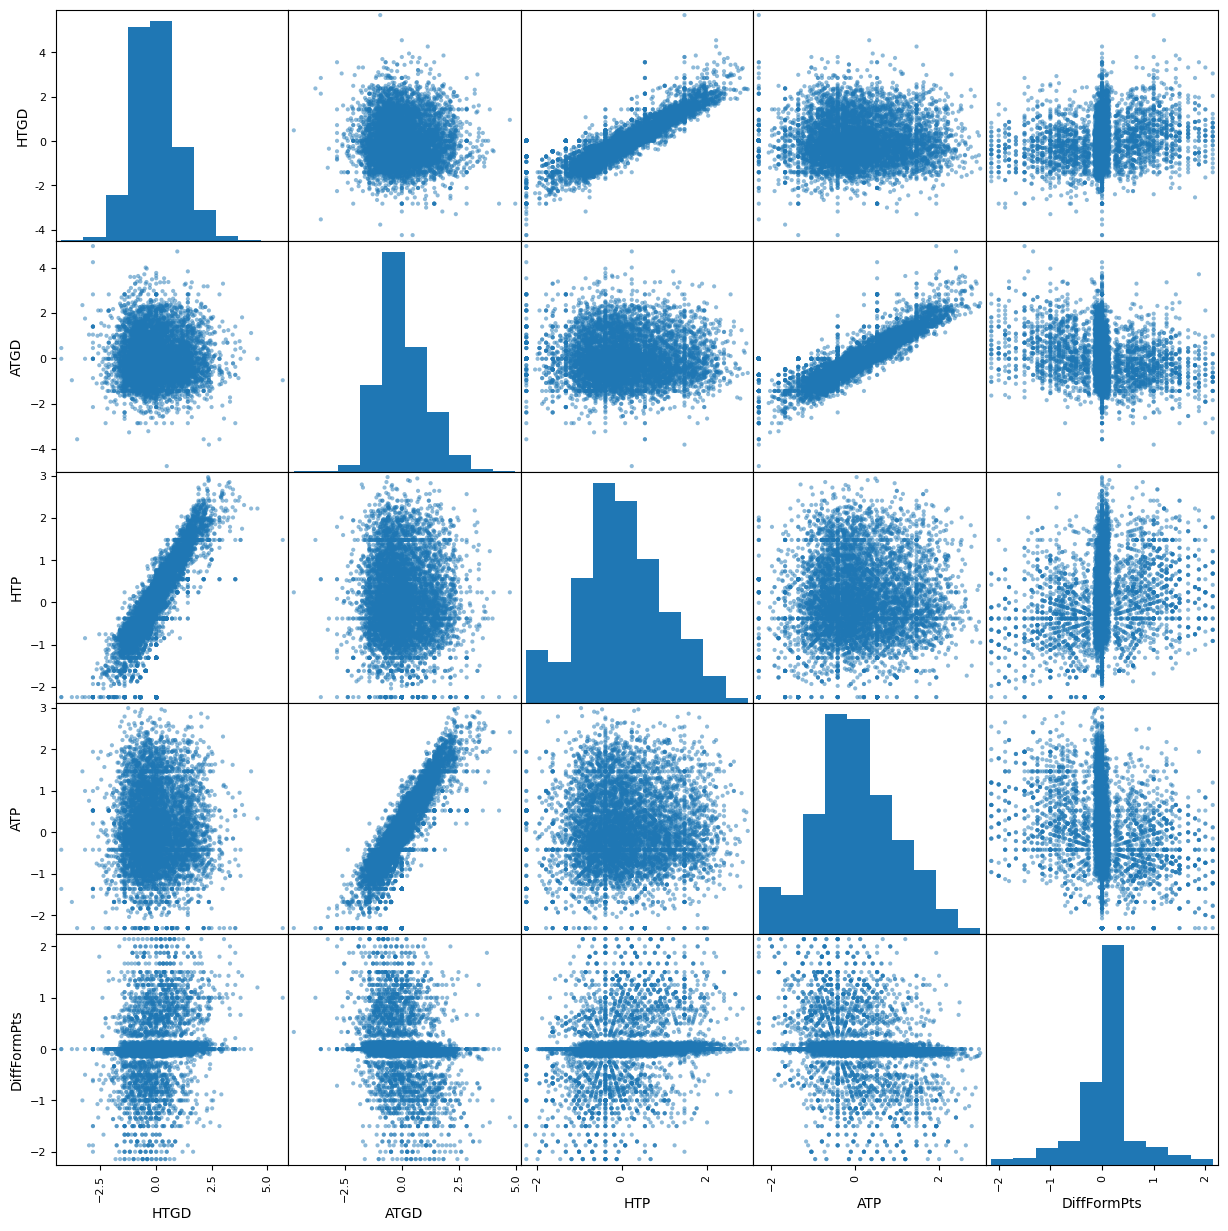

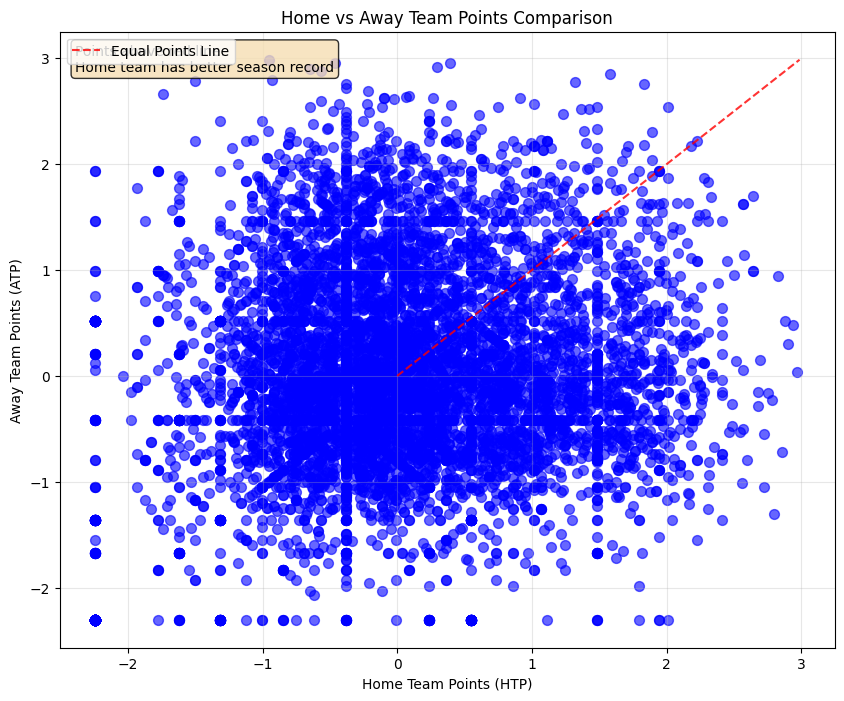

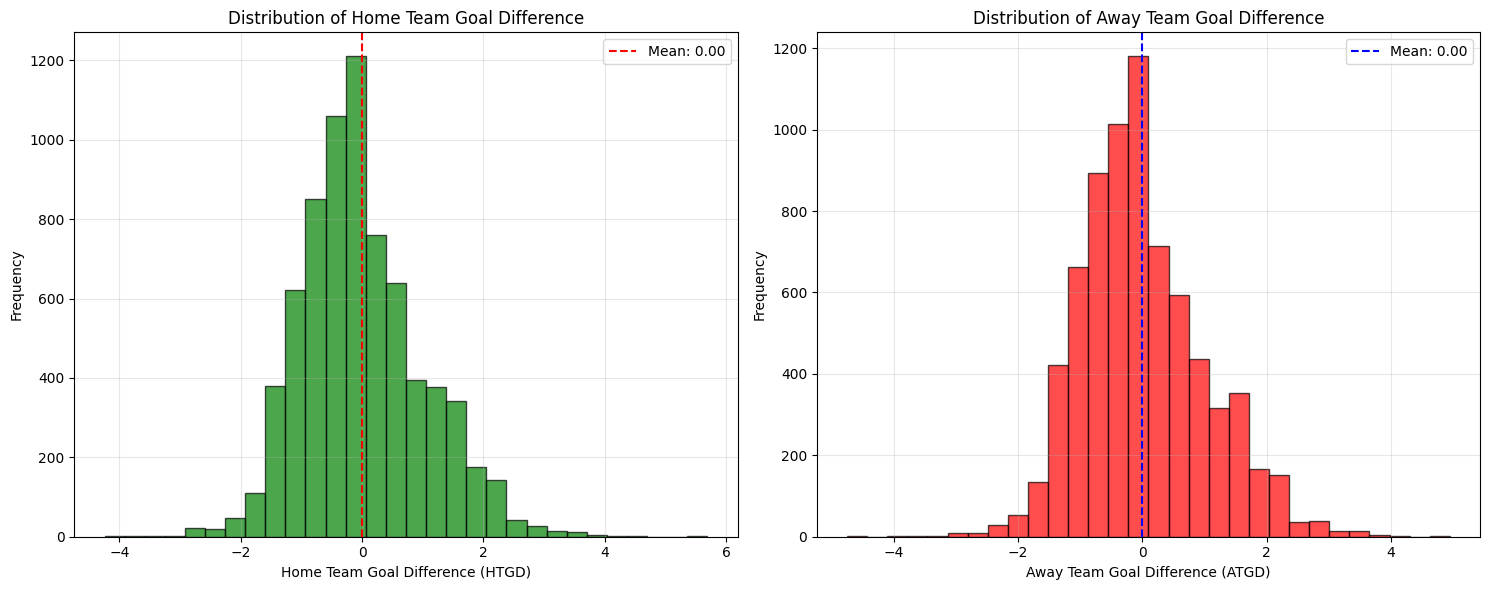

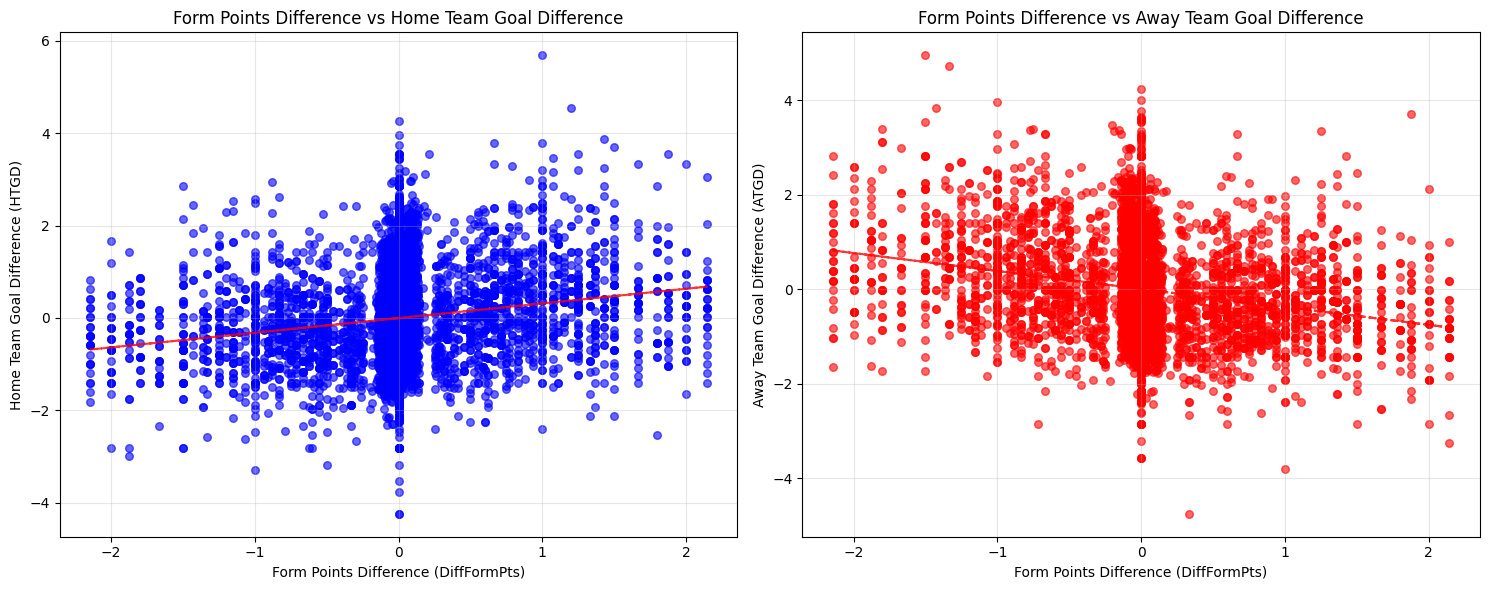

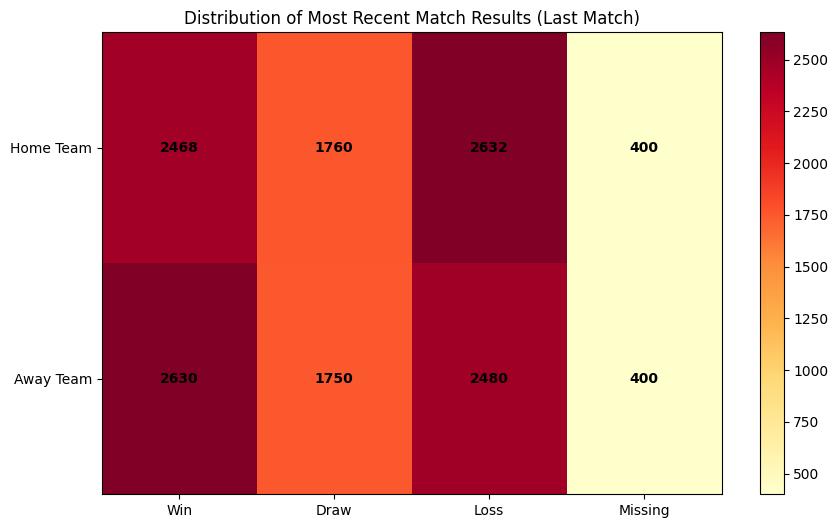

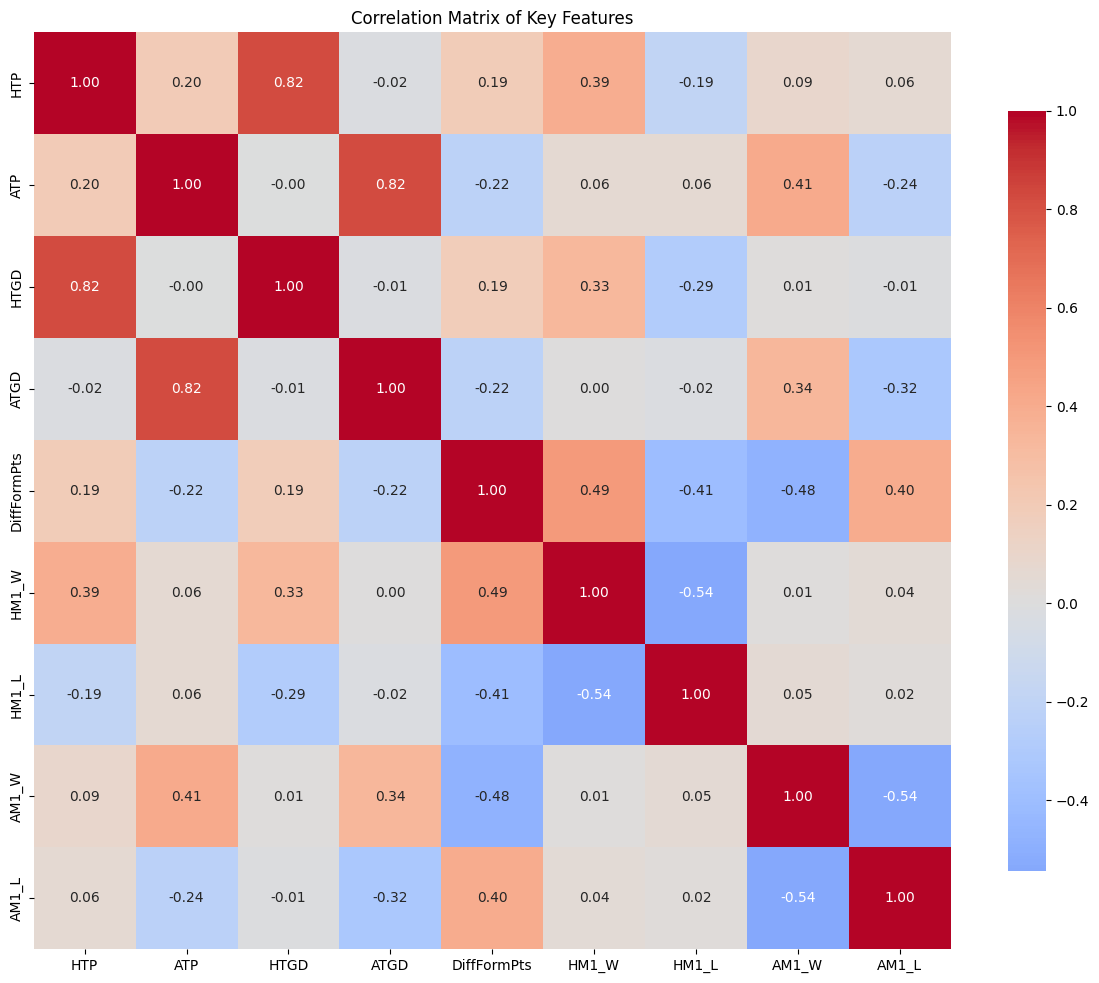

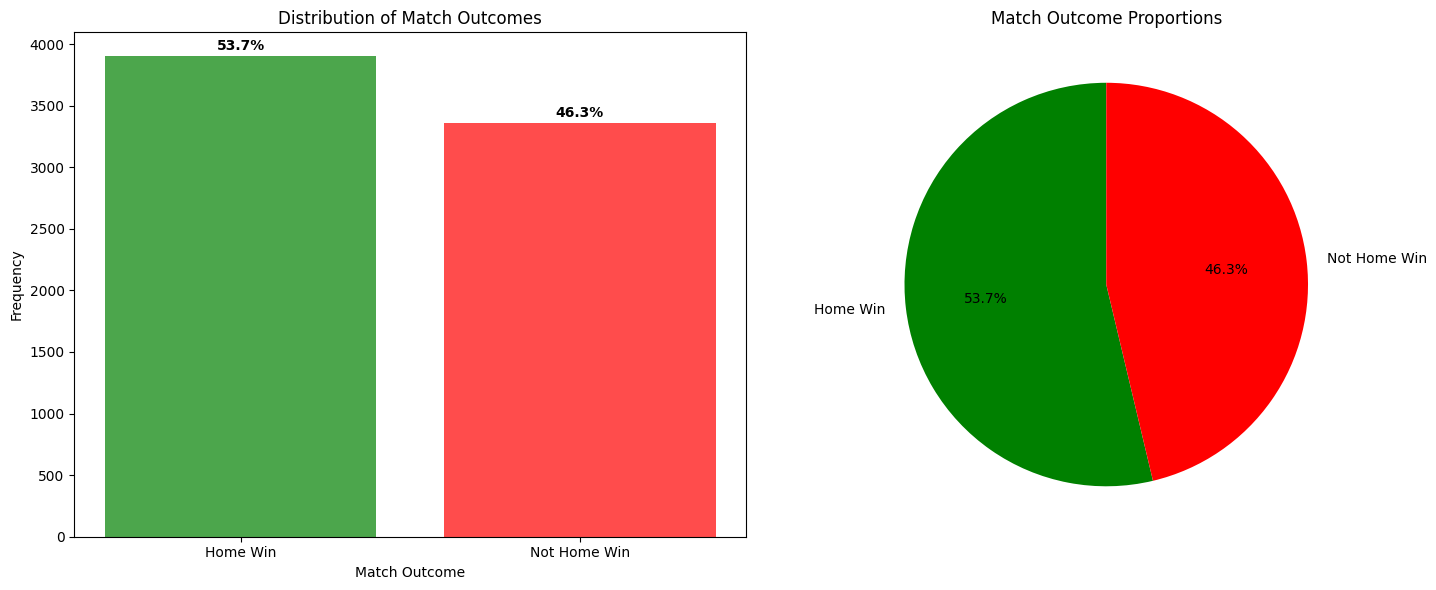

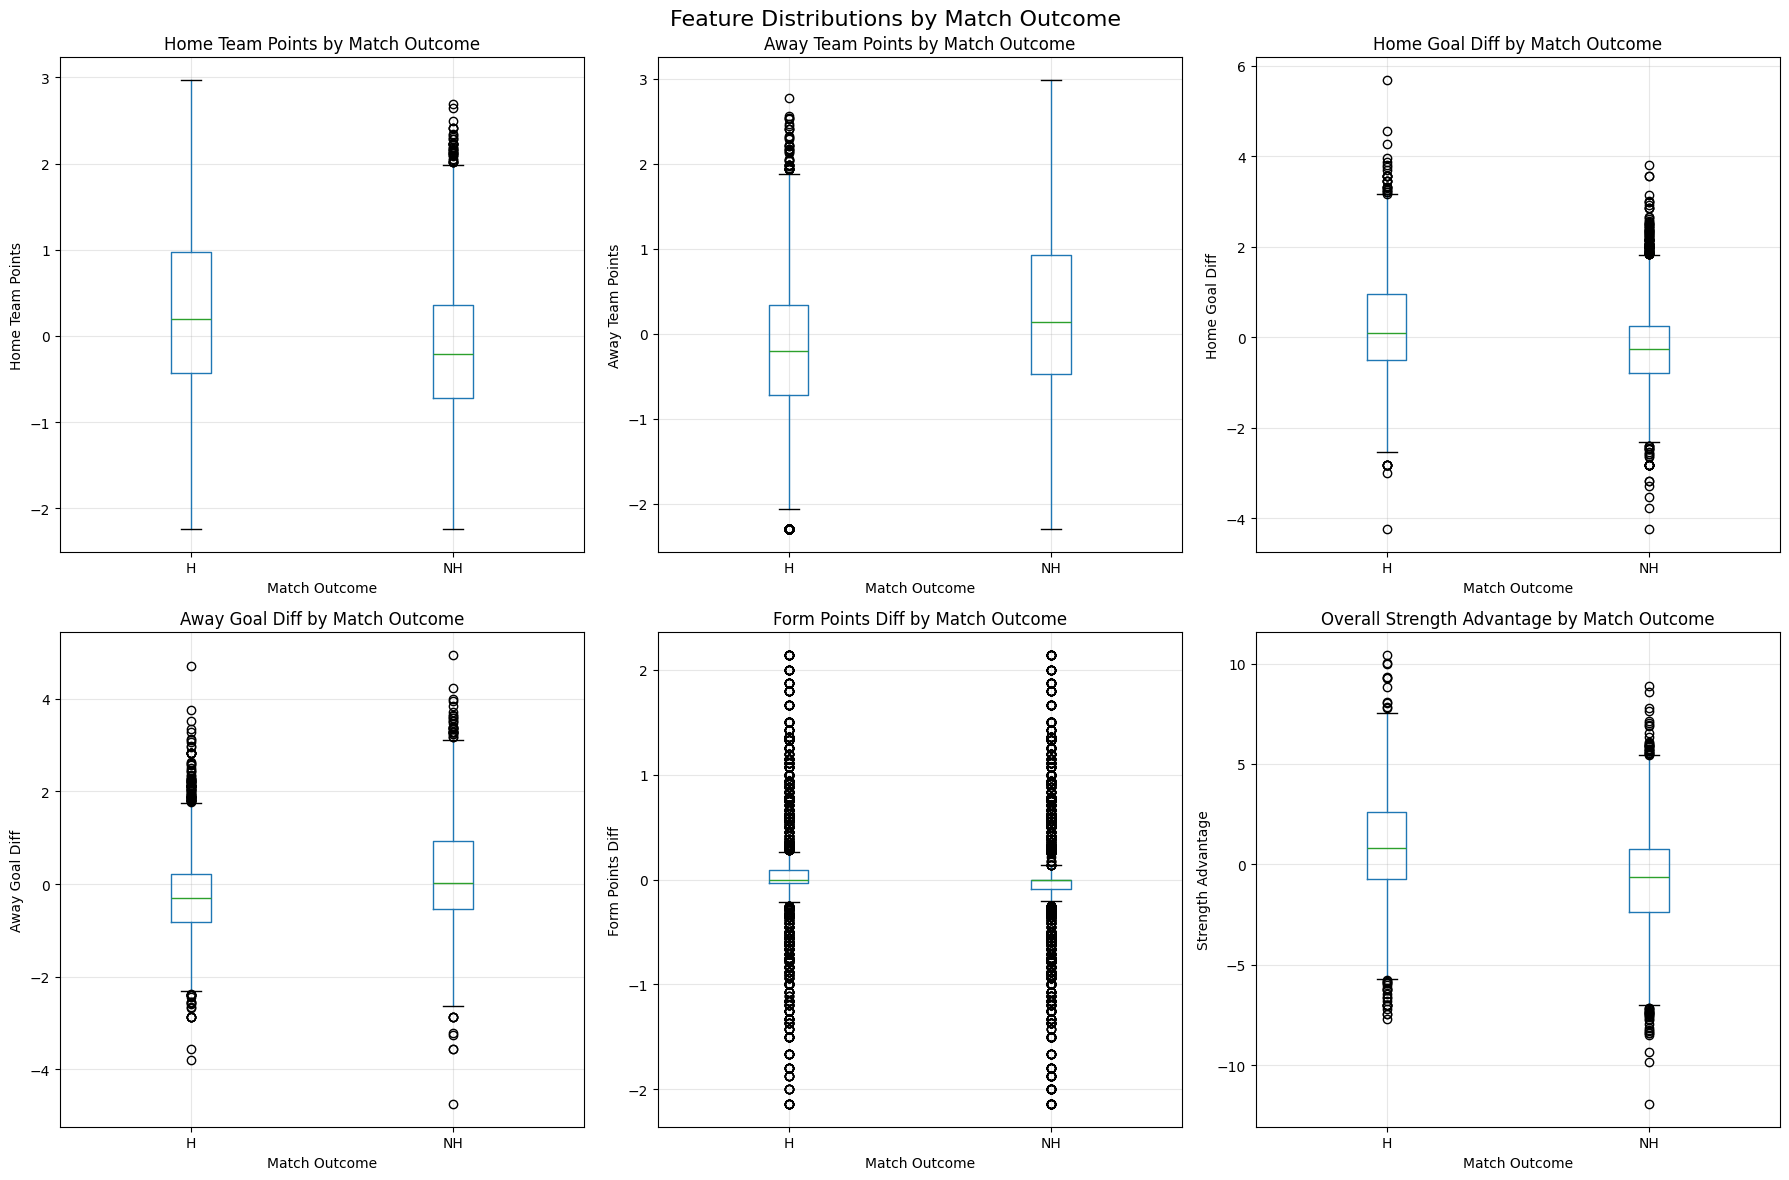

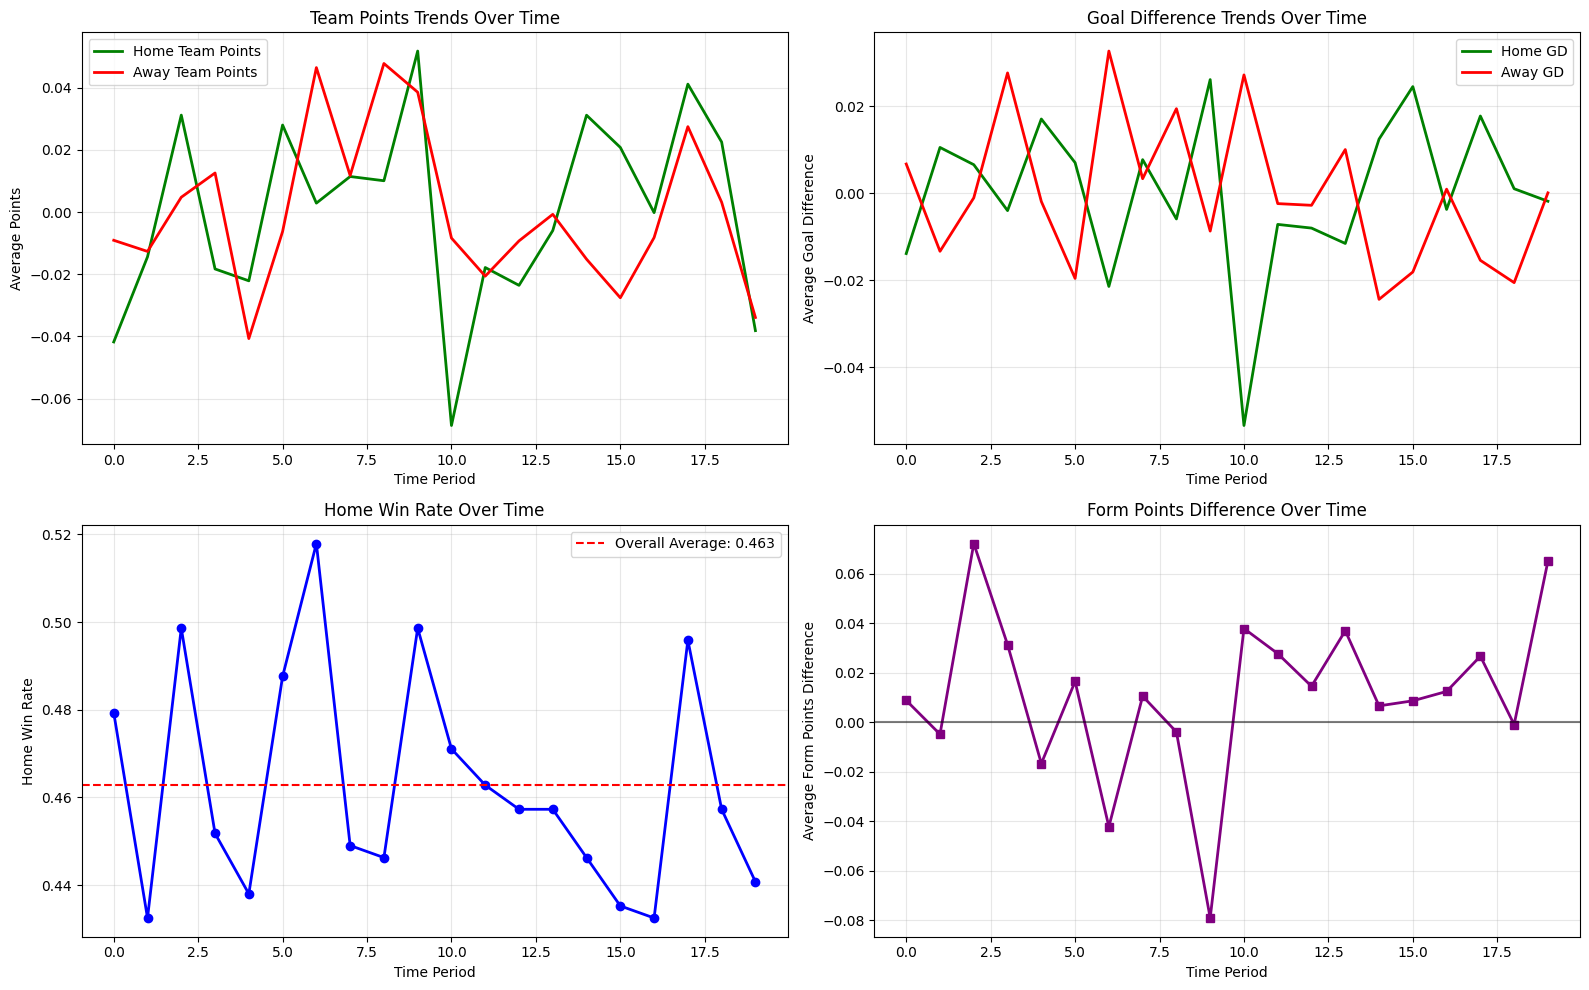

<Figure size 640x480 with 0 Axes>

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,HM3_D,HM3_L,HM3_M,HM3_W,AM1_D,AM1_L,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
Unnamed: 0,1.00,0.01,-0.00,-0.02,0.01,-0.00,0.01,-0.03,-0.02,0.04,-0.01,-0.03,-0.02,0.04,-0.01,-0.00,0.00,-0.00,0.00,-0.01,-0.02,0.04,-0.02,-0.01,-0.02,0.04,-0.03,0.00,-0.01,0.01
HTP,0.01,1.00,0.20,0.00,-0.19,-0.42,0.39,-0.04,-0.17,-0.02,0.23,-0.03,-0.14,-0.04,0.22,0.06,0.06,-0.42,0.09,0.01,-0.01,-0.02,0.03,0.02,0.01,-0.04,0.04,0.82,-0.02,0.19
ATP,-0.00,0.20,1.00,0.06,0.06,-0.38,0.06,0.01,0.01,-0.02,0.02,0.01,0.02,-0.04,0.02,-0.00,-0.24,-0.38,0.41,-0.03,-0.19,-0.02,0.25,-0.02,-0.17,-0.04,0.24,-0.00,0.82,-0.22
HM1_D,-0.02,0.00,0.06,1.00,-0.43,-0.14,-0.41,0.63,-0.25,-0.02,-0.26,0.61,-0.24,-0.02,-0.25,0.02,0.02,-0.14,0.03,0.00,0.02,-0.02,0.01,0.00,0.02,-0.02,0.01,-0.03,0.00,-0.09
HM1_L,0.01,-0.19,0.06,-0.43,1.00,-0.18,-0.54,-0.27,0.58,-0.00,-0.34,-0.26,0.56,0.00,-0.33,0.02,0.02,-0.18,0.05,-0.01,0.00,-0.00,0.01,-0.01,-0.00,0.00,0.01,-0.29,-0.02,-0.41
HM1_M,-0.00,-0.42,-0.38,-0.14,-0.18,1.00,-0.17,-0.09,-0.11,0.22,-0.11,-0.08,-0.10,0.20,-0.11,-0.14,-0.17,1.00,-0.18,-0.09,-0.11,0.22,-0.11,-0.08,-0.10,0.20,-0.10,-0.02,0.02,-0.00
HM1_W,0.01,0.39,0.06,-0.41,-0.54,-0.17,1.00,-0.26,-0.31,-0.08,0.63,-0.25,-0.30,-0.08,0.61,0.03,0.04,-0.17,0.01,0.05,0.03,-0.08,0.03,0.05,0.03,-0.08,0.03,0.33,0.00,0.49
HM2_D,-0.03,-0.04,0.01,0.63,-0.27,-0.09,-0.26,1.00,-0.16,-0.40,-0.16,0.96,-0.15,-0.37,-0.16,0.01,0.03,-0.09,-0.00,0.16,0.21,-0.40,0.19,0.15,0.20,-0.37,0.18,-0.03,0.00,-0.09
HM2_L,-0.02,-0.17,0.01,-0.25,0.58,-0.11,-0.31,-0.16,1.00,-0.49,-0.20,-0.15,0.96,-0.46,-0.19,0.01,0.03,-0.11,0.01,0.19,0.25,-0.49,0.25,0.17,0.23,-0.46,0.24,-0.19,-0.00,-0.45
HM2_M,0.04,-0.02,-0.02,-0.02,-0.00,0.22,-0.08,-0.40,-0.49,1.00,-0.51,-0.38,-0.47,0.95,-0.49,-0.05,-0.07,0.22,0.00,-0.41,-0.50,1.00,-0.49,-0.39,-0.48,0.95,-0.47,-0.00,-0.01,-0.03


Generated 10 visualizations for comprehensive EDA analysis


/tmp/ipykernel_278711/260549421.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


In [61]:
# Generate all visualizations and append to plots list
scatter_plot = get_scatter_matrix(df)
plots.append(scatter_plot)
# Convert boolean columns to integers for correlation analysis
df_numeric = df.copy()
bool_cols = df_numeric.select_dtypes(include=['bool']).columns
df_numeric[bool_cols] = df_numeric[bool_cols].astype(int)
# Remove non-numeric columns that can't be converted to numeric
df_numeric = df_numeric.select_dtypes(include=['int64', 'float64'])
# Fix the correlation matrix styling issue
corr_styled = df_numeric.corr().style.background_gradient(cmap='coolwarm').format(precision=2)
plots.append(corr_styled)
plots.append(get_team_points_comparison(df))
plots.append(get_goal_difference_distribution(df))
plots.append(get_form_points_analysis(df))
plots.append(get_recent_form_heatmap(df))
plots.append(get_feature_correlation_heatmap(df))
# Fix target distribution function to handle actual FTR values

plots.append(get_target_distribution_fixed(df))
plots.append(get_feature_importance_boxplots(df))
plots.append(get_temporal_trends(df))

# Display all plots
for i, plot in enumerate(plots):
  if hasattr(plot, 'show'):
    plot.show()
  elif hasattr(plot, '_repr_html_'):  # For styled DataFrames
    display(plot)
  else:
    plt.figure(i)
    plt.show()

print(f"Generated {len(plots)} visualizations for comprehensive EDA analysis")

In [55]:
print("Column names:")
print(df.columns.tolist())
print(f"\nTotal number of columns: {len(df.columns)}")

Column names:
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'FTR', 'strength_advantage', 'time_bin']

Total number of columns: 33
